In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [2]:
data = pd.read_csv('./Data/train_data.csv')
data_test = pd.read_csv('./Data/test_data.csv')

In [3]:
data

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,No,NO,Other,True,0
1,000ELHLBPV,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,Yes,No,Auto,False,1
2,000G6CHJON,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,Married,No,No,Education,True,0
3,000K09D0JB,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,Divorced,No,No,Education,True,0
4,000NTH4YTU,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,Married,Yes,No,Business,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225342,ZZZHT6VWO4,37.0,25394.0,NaN,527,12,2.0,NaN,24,0.17,Bachelor's,Unemployed,Married,Ye,Maybe,Education,False,1
225343,ZZZI5YOV9G,32.0,101616.0,101862.0,628,32,2.0,17.45,12,0.38,High School,Full-time,Single,Yes,no,Education,False,1
225344,ZZZMFPZFKE,NaN,102495.0,140375.0,764,82,4.0,23.82,24,0.63,High School,Full-time,Divorced,yes,No,Other,False,0
225345,ZZZV1HB132,69.0,143661.0,157929.0,407,38,4.0,6.07,60,0.33,Master's,Part-time,Divorced,Yes,Yes,Home,False,0


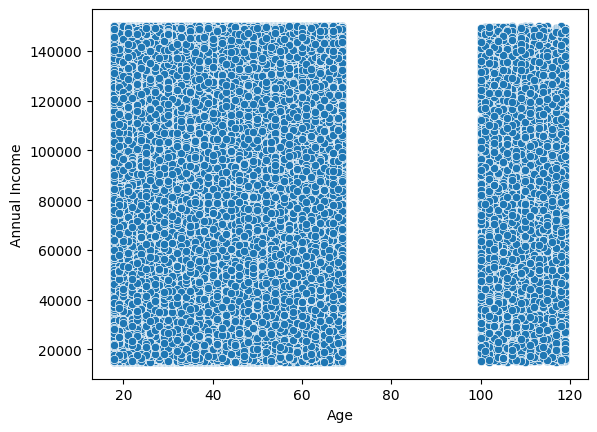

In [4]:
# plot Annual Income vs. Investment Amount
sns.scatterplot(x='Age',y='Annual_Income',data=data)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [5]:
# value counts of data point where age is greater than 65
data.drop(data[data['Age']>65].index,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204203 entries, 0 to 225346
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Investor_ID                     204203 non-null  object 
 1   Age                             171363 non-null  float64
 2   Annual_Income                   183801 non-null  float64
 3   Investment_Amount               187803 non-null  float64
 4   Risk_Tolerance_Score            204203 non-null  int64  
 5   Months_of_Investing_Experience  204203 non-null  int64  
 6   Number_of_Active_Investments    200108 non-null  float64
 7   Potential_Return_Rate           193982 non-null  float64
 8   Investment_Duration             204203 non-null  int64  
 9   Investment_to_Income_Ratio      204203 non-null  float64
 10  Education                       204203 non-null  object 
 11  Employment_Status               204203 non-null  object 
 12  Marital_Status       

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Investor_ID                     30000 non-null  object 
 1   Age                             25698 non-null  float64
 2   Annual_Income                   27092 non-null  float64
 3   Investment_Amount               27606 non-null  float64
 4   Risk_Tolerance_Score            30000 non-null  int64  
 5   Months_of_Investing_Experience  30000 non-null  int64  
 6   Number_of_Active_Investments    29406 non-null  float64
 7   Potential_Return_Rate           28477 non-null  float64
 8   Investment_Duration             30000 non-null  int64  
 9   Investment_to_Income_Ratio      30000 non-null  float64
 10  Education                       30000 non-null  object 
 11  Employment_Status               30000 non-null  object 
 12  Marital_Status                  

## Making uniform categorical representations of all Coloumns

In [8]:
data.drop('Investor_ID',axis=1,inplace=True)
investorID_test = data_test['Investor_ID']
data_test.drop('Investor_ID',axis=1,inplace=True)

In [9]:
data["Marital_Status"].value_counts()

Marital_Status
Divorced    35476
Married     35362
Single      35202
Sgl         19924
Marr        19778
Div         19556
Name: count, dtype: int64

In [10]:
data_test["Marital_Status"].value_counts()

Marital_Status
Divorced    5225
Married     5135
Single      5111
Sgl         2976
Div         2957
Marr        2915
Name: count, dtype: int64

In [11]:
data["Marital_Status"].replace({"Sgl":"Single","Marr":"Married","Div":"Divorced"},inplace=True)
data_test["Marital_Status"].replace({"Sgl":"Single","Marr":"Married","Div":"Divorced"},inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\1611664452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Marital_Status"].replace({"Sgl":"Single","Marr":"Married","Div":"Divorced"},inplace=True)
C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\1611664452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [12]:
data["Marital_Status"].value_counts()

Marital_Status
Married     55140
Single      55126
Divorced    55032
Name: count, dtype: int64

In [13]:
data_test["Marital_Status"].value_counts()

Marital_Status
Divorced    8182
Single      8087
Married     8050
Name: count, dtype: int64

In [14]:
data["Education"].value_counts()

Education
Bachelor's     51447
Master's       50966
High School    50897
PhD            50893
Name: count, dtype: int64

In [15]:
data_test["Education"].value_counts()

Education
High School    7786
Bachelor's     7618
Master's       7317
PhD            7279
Name: count, dtype: int64

In [16]:
data_test["Employment_Status"].value_counts()

Employment_Status
Unemployed       7193
Part-time        7076
Self-employed    6911
Full-time        6682
Part              571
Self              504
Unem              483
Full              478
Retired           102
Name: count, dtype: int64

In [17]:
data["Employment_Status"].value_counts()

Employment_Status
Part-time        47694
Self-employed    47398
Full-time        47321
Unemployed       46980
Self              3549
Full              3501
Part              3492
Unem              3448
Retired            820
Name: count, dtype: int64

In [18]:
data["Employment_Status"].replace({"Self":"Self-employed","Part":"Part-time","Full":"Full-time","Unem":"Unemployed","Retired":"Retired"},inplace=True)
data_test["Employment_Status"].replace({"Self":"Self-wife","Part":"Part-time","Full":"Full-time","Unem":"Unemployed","Retired":"Retired"},inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\3313178365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Employment_Status"].replace({"Self":"Self-employed","Part":"Part-time","Full":"Full-time","Unem":"Unemployed","Retired":"Retired"},inplace=True)
C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\3313178365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never 

In [19]:
data["Employment_Status"].value_counts()

Employment_Status
Part-time        51186
Self-employed    50947
Full-time        50822
Unemployed       50428
Retired            820
Name: count, dtype: int64

In [20]:
data_test["Employment_Status"].value_counts()

Employment_Status
Unemployed       7676
Part-time        7647
Full-time        7160
Self-employed    6911
Self-wife         504
Retired           102
Name: count, dtype: int64

In [21]:
# pkl data dataframe
data.to_pickle("data_cleaned.pkl")

In [22]:
data["Owns_Property"].value_counts()

Owns_Property
No         85294
Yes        77645
Ye          8501
no          7485
NO          7468
YES         6707
yes         6561
Unknown     1549
Maybe       1515
YE           748
ye           730
Name: count, dtype: int64

In [23]:
data["Owns_Property"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","YES":"Yes","yes":"Yes","Maybe":"Unknown","Unknown":"Unknown"},inplace=True)
data_test["Owns_Property"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","YES":"Yes","yes":"Yes","Maybe":"Unknown","Unknown":"Unknown"},inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\559085110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Owns_Property"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","YES":"Yes","yes":"Yes","Maybe":"Unknown","Unknown":"Unknown"},inplace=True)
C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\559085110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

In [24]:
data["Owns_Property"].value_counts()

Owns_Property
Yes        100892
No         100247
Unknown      3064
Name: count, dtype: int64

In [25]:
data_test["Owns_Property"].value_counts()

Owns_Property
No         15054
Yes        14555
Unknown      391
Name: count, dtype: int64

In [26]:
data["Has_Dependents"].value_counts()

Has_Dependents
No         80649
Yes        65012
Ye         15870
no          9928
NO          9861
yes         8001
YES         7859
ye          1961
YE          1912
Maybe       1674
Unknown     1476
Name: count, dtype: int64

In [27]:
data_test["Has_Dependents"].value_counts()

Has_Dependents
No         12039
Yes         9305
Ye          2355
NO          1484
no          1476
YES         1191
yes         1176
YE           288
ye           264
Maybe        218
Unknown      204
Name: count, dtype: int64

In [28]:
data["Has_Dependents"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","yes":"Yes","YES":"Yes","ye":"Yes","YE":"Yes","Maybe":"Unknown"},inplace=True)
data_test["Has_Dependents"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","yes":"Yes","YES":"Yes","ye":"Yes","YE":"Yes","Maybe":"Unknown"},inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\2351222716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Has_Dependents"].replace({"YE":"Yes","ye":"Yes","No":"No","Yes":"Yes","Ye":"Yes","no":"No","NO":"No","yes":"Yes","YES":"Yes","ye":"Yes","YE":"Yes","Maybe":"Unknown"},inplace=True)
C:\Users\alisa\AppData\Local\Temp\ipykernel_10620\2351222716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3

In [29]:
data["Has_Dependents"].value_counts()

Has_Dependents
Yes        100615
No         100438
Unknown      3150
Name: count, dtype: int64

In [30]:
data_test["Has_Dependents"].value_counts()

Has_Dependents
No         14999
Yes        14579
Unknown      422
Name: count, dtype: int64

In [31]:
data["Investment_Sector"].value_counts()

Investment_Sector
Home         41085
Business     40948
Other        40751
Education    40713
Auto         40706
Name: count, dtype: int64

In [32]:
data.to_pickle("data_cleaned.pkl")

In [33]:
data["Marital_Status"].value_counts()

Marital_Status
Married     55140
Single      55126
Divorced    55032
Name: count, dtype: int64

In [34]:
# Has_Investment_Advisor convert column to string
data["Has_Investment_Advisor"].astype(str)
data_test["Has_Investment_Advisor"].astype(str)
data["Has_Investment_Advisor"].value_counts()
data_test["Has_Investment_Advisor"].value_counts()

Has_Investment_Advisor
False    14941
True     14579
Name: count, dtype: int64

### Caterogical to Numerical Encdoding

In [35]:
def marital_status(x):
    if x=="Married":
        return 1
    elif x=="Single":
        return 2
    elif x == "Divorced":
        return 0

def investment_advisor(x):
    if x==True:
        return 1
    elif x==False:
        return 0

In [36]:
data

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,No,No,Other,True,0
1,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,Yes,No,Auto,False,1
2,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,Married,No,No,Education,True,0
3,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,Divorced,No,No,Education,True,0
4,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,Married,Yes,No,Business,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225341,30.0,118720.0,93079.0,619,51,1.0,5.41,60,0.65,High School,Unemployed,Married,No,Yes,Other,True,0
225342,37.0,25394.0,NaN,527,12,2.0,NaN,24,0.17,Bachelor's,Unemployed,Married,Yes,Unknown,Education,False,1
225343,32.0,101616.0,101862.0,628,32,2.0,17.45,12,0.38,High School,Full-time,Single,Yes,No,Education,False,1
225344,NaN,102495.0,140375.0,764,82,4.0,23.82,24,0.63,High School,Full-time,Divorced,Yes,No,Other,False,0


In [37]:
data_test

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor
0,NaN,73311.0,9698.0,669,71,4.0,9.13,24,0.30,Bachelor's,Self-employed,Single,No,No,Other,True
1,NaN,123781.0,165751.0,739,82,2.0,14.74,12,0.71,PhD,Unemployed,Single,Yes,Yes,Education,True
2,114.0,49133.0,NaN,442,2,3.0,4.18,48,0.18,PhD,Full-time,Married,Yes,Yes,Business,False
3,37.0,109759.0,207283.0,1008,114,1.0,17.14,12,0.86,Bachelor's,Self-employed,Single,No,Yes,Business,False
4,41.0,57751.0,NaN,836,97,2.0,7.04,60,0.32,High School,Self-employed,Divorced,Yes,No,Education,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39.0,85806.0,79236.0,493,82,1.0,10.68,36,0.44,Master's,Full-time,Married,No,Yes,Education,False
29996,NaN,21254.0,NaN,527,75,1.0,15.64,24,0.63,Bachelor's,Self-employed,Married,Yes,Yes,Other,True
29997,NaN,23343.0,158966.0,623,109,3.0,11.50,36,0.34,PhD,Self-employed,NaN,Yes,Yes,Other,True
29998,46.0,56380.0,221211.0,432,85,4.0,8.71,36,0.40,PhD,Unemployed,Single,No,Yes,Home,True


In [38]:
data["Marital_Status"]= data["Marital_Status"].apply(marital_status)
data["Marital_Status"].value_counts()

Marital_Status
1.0    55140
2.0    55126
0.0    55032
Name: count, dtype: int64

In [39]:
data_test["Marital_Status"]= data_test["Marital_Status"].apply(marital_status)
data_test["Marital_Status"].value_counts()

Marital_Status
0.0    8182
2.0    8087
1.0    8050
Name: count, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204203 entries, 0 to 225346
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             171363 non-null  float64
 1   Annual_Income                   183801 non-null  float64
 2   Investment_Amount               187803 non-null  float64
 3   Risk_Tolerance_Score            204203 non-null  int64  
 4   Months_of_Investing_Experience  204203 non-null  int64  
 5   Number_of_Active_Investments    200108 non-null  float64
 6   Potential_Return_Rate           193982 non-null  float64
 7   Investment_Duration             204203 non-null  int64  
 8   Investment_to_Income_Ratio      204203 non-null  float64
 9   Education                       204203 non-null  object 
 10  Employment_Status               204203 non-null  object 
 11  Marital_Status                  165298 non-null  float64
 12  Owns_Property        

In [41]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             25698 non-null  float64
 1   Annual_Income                   27092 non-null  float64
 2   Investment_Amount               27606 non-null  float64
 3   Risk_Tolerance_Score            30000 non-null  int64  
 4   Months_of_Investing_Experience  30000 non-null  int64  
 5   Number_of_Active_Investments    29406 non-null  float64
 6   Potential_Return_Rate           28477 non-null  float64
 7   Investment_Duration             30000 non-null  int64  
 8   Investment_to_Income_Ratio      30000 non-null  float64
 9   Education                       30000 non-null  object 
 10  Employment_Status               30000 non-null  object 
 11  Marital_Status                  24319 non-null  float64
 12  Owns_Property                   

In [42]:
data["Education"].value_counts()

Education
Bachelor's     51447
Master's       50966
High School    50897
PhD            50893
Name: count, dtype: int64

In [43]:
data["Has_Investment_Advisor"].value_counts()

Has_Investment_Advisor
True     100644
False    100051
Name: count, dtype: int64

In [44]:
data["Has_Investment_Advisor"] = data["Has_Investment_Advisor"].apply(investment_advisor)
data["Has_Investment_Advisor"].value_counts()

Has_Investment_Advisor
1.0    100644
0.0    100051
Name: count, dtype: int64

In [45]:
data_test["Has_Investment_Advisor"] = data_test["Has_Investment_Advisor"].apply(investment_advisor)
data_test["Has_Investment_Advisor"].value_counts()

Has_Investment_Advisor
0.0    14941
1.0    14579
Name: count, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204203 entries, 0 to 225346
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             171363 non-null  float64
 1   Annual_Income                   183801 non-null  float64
 2   Investment_Amount               187803 non-null  float64
 3   Risk_Tolerance_Score            204203 non-null  int64  
 4   Months_of_Investing_Experience  204203 non-null  int64  
 5   Number_of_Active_Investments    200108 non-null  float64
 6   Potential_Return_Rate           193982 non-null  float64
 7   Investment_Duration             204203 non-null  int64  
 8   Investment_to_Income_Ratio      204203 non-null  float64
 9   Education                       204203 non-null  object 
 10  Employment_Status               204203 non-null  object 
 11  Marital_Status                  165298 non-null  float64
 12  Owns_Property        

In [47]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             25698 non-null  float64
 1   Annual_Income                   27092 non-null  float64
 2   Investment_Amount               27606 non-null  float64
 3   Risk_Tolerance_Score            30000 non-null  int64  
 4   Months_of_Investing_Experience  30000 non-null  int64  
 5   Number_of_Active_Investments    29406 non-null  float64
 6   Potential_Return_Rate           28477 non-null  float64
 7   Investment_Duration             30000 non-null  int64  
 8   Investment_to_Income_Ratio      30000 non-null  float64
 9   Education                       30000 non-null  object 
 10  Employment_Status               30000 non-null  object 
 11  Marital_Status                  24319 non-null  float64
 12  Owns_Property                   

In [48]:
data["Marital_Status"].value_counts()

Marital_Status
1.0    55140
2.0    55126
0.0    55032
Name: count, dtype: int64

In [49]:
data["Has_Investment_Advisor"].value_counts()

Has_Investment_Advisor
1.0    100644
0.0    100051
Name: count, dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204203 entries, 0 to 225346
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             171363 non-null  float64
 1   Annual_Income                   183801 non-null  float64
 2   Investment_Amount               187803 non-null  float64
 3   Risk_Tolerance_Score            204203 non-null  int64  
 4   Months_of_Investing_Experience  204203 non-null  int64  
 5   Number_of_Active_Investments    200108 non-null  float64
 6   Potential_Return_Rate           193982 non-null  float64
 7   Investment_Duration             204203 non-null  int64  
 8   Investment_to_Income_Ratio      204203 non-null  float64
 9   Education                       204203 non-null  object 
 10  Employment_Status               204203 non-null  object 
 11  Marital_Status                  165298 non-null  float64
 12  Owns_Property        

In [51]:
data.to_pickle("data_cleaned.pkl")

In [52]:
data_test.to_pickle("data_cleaned_test.pkl")

In [53]:
data

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,No,No,Other,1.0,0
1,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,Yes,No,Auto,0.0,1
2,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,1.0,No,No,Education,1.0,0
3,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,0.0,No,No,Education,1.0,0
4,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,1.0,Yes,No,Business,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225341,30.0,118720.0,93079.0,619,51,1.0,5.41,60,0.65,High School,Unemployed,1.0,No,Yes,Other,1.0,0
225342,37.0,25394.0,NaN,527,12,2.0,NaN,24,0.17,Bachelor's,Unemployed,1.0,Yes,Unknown,Education,0.0,1
225343,32.0,101616.0,101862.0,628,32,2.0,17.45,12,0.38,High School,Full-time,2.0,Yes,No,Education,0.0,1
225344,NaN,102495.0,140375.0,764,82,4.0,23.82,24,0.63,High School,Full-time,0.0,Yes,No,Other,0.0,0


In [54]:
df = pd.read_pickle('data_cleaned.pkl')

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Setting up the iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Columns to impute
columns_to_impute = ['Age', 'Annual_Income', 'Investment_Amount', 'Number_of_Active_Investments', 'Potential_Return_Rate', 'Marital_Status', 'Has_Investment_Advisor']

# Performing the imputation
imputed_data = imputer.fit_transform(df[columns_to_impute])

# Filling the original dataframe with the imputed data
df[columns_to_impute] = imputed_data

print('Iterative imputation completed.')

Iterative imputation completed.


In [56]:
df_test = pd.read_pickle('data_cleaned_test.pkl')

In [57]:
df_test

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor
0,NaN,73311.0,9698.0,669,71,4.0,9.13,24,0.30,Bachelor's,Self-employed,2.0,No,No,Other,1.0
1,NaN,123781.0,165751.0,739,82,2.0,14.74,12,0.71,PhD,Unemployed,2.0,Yes,Yes,Education,1.0
2,114.0,49133.0,NaN,442,2,3.0,4.18,48,0.18,PhD,Full-time,1.0,Yes,Yes,Business,0.0
3,37.0,109759.0,207283.0,1008,114,1.0,17.14,12,0.86,Bachelor's,Self-employed,2.0,No,Yes,Business,0.0
4,41.0,57751.0,NaN,836,97,2.0,7.04,60,0.32,High School,Self-employed,0.0,Yes,No,Education,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39.0,85806.0,79236.0,493,82,1.0,10.68,36,0.44,Master's,Full-time,1.0,No,Yes,Education,0.0
29996,NaN,21254.0,NaN,527,75,1.0,15.64,24,0.63,Bachelor's,Self-employed,1.0,Yes,Yes,Other,1.0
29997,NaN,23343.0,158966.0,623,109,3.0,11.50,36,0.34,PhD,Self-employed,NaN,Yes,Yes,Other,1.0
29998,46.0,56380.0,221211.0,432,85,4.0,8.71,36,0.40,PhD,Unemployed,2.0,No,Yes,Home,1.0


In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Setting up the iterative imputer
imputer_test = IterativeImputer(max_iter=10, random_state=0)

# Columns to impute
columns_to_impute = ['Age', 'Annual_Income', 'Investment_Amount', 'Number_of_Active_Investments', 'Potential_Return_Rate', 'Marital_Status', 'Has_Investment_Advisor']

# Performing the imputation
imputed_data_test = imputer_test.fit_transform(df_test[columns_to_impute])

# Filling the original dataframe with the imputed data
df_test[columns_to_impute] = imputed_data_test

print('Iterative imputation completed for test data.')

Iterative imputation completed for test data.


In [59]:
df.head()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,51.000000,82733.413914,87300.0,358,13,3.0,18.100000,12,0.85,Bachelor's,Part-time,0.995902,No,No,Other,1.0,0
1,37.000000,81658.000000,152598.0,792,23,4.0,14.060000,24,0.86,PhD,Self-employed,1.000711,Yes,No,Auto,0.0,1
2,41.632286,82704.049725,77767.0,359,57,4.0,4.310000,60,0.60,Master's,Unemployed,1.000000,No,No,Education,1.0,0
3,54.000000,42344.000000,13261.0,366,115,1.0,13.476417,60,0.21,PhD,Part-time,0.000000,No,No,Education,1.0,0
4,63.000000,48898.000000,193990.0,792,53,4.0,5.650000,48,0.82,Master's,Self-employed,1.000000,Yes,No,Business,1.0,0


In [60]:
df_test.head()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor
0,44.992243,73311.0,9698.000000,669,71,4.0,9.13,24,0.30,Bachelor's,Self-employed,2.0,No,No,Other,1.0
1,44.481354,123781.0,165751.000000,739,82,2.0,14.74,12,0.71,PhD,Unemployed,2.0,Yes,Yes,Education,1.0
2,114.000000,49133.0,134618.067641,442,2,3.0,4.18,48,0.18,PhD,Full-time,1.0,Yes,Yes,Business,0.0
3,37.000000,109759.0,207283.000000,1008,114,1.0,17.14,12,0.86,Bachelor's,Self-employed,2.0,No,Yes,Business,0.0
4,41.000000,57751.0,133837.939667,836,97,2.0,7.04,60,0.32,High School,Self-employed,0.0,Yes,No,Education,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204203 entries, 0 to 225346
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             204203 non-null  float64
 1   Annual_Income                   204203 non-null  float64
 2   Investment_Amount               204203 non-null  float64
 3   Risk_Tolerance_Score            204203 non-null  int64  
 4   Months_of_Investing_Experience  204203 non-null  int64  
 5   Number_of_Active_Investments    204203 non-null  float64
 6   Potential_Return_Rate           204203 non-null  float64
 7   Investment_Duration             204203 non-null  int64  
 8   Investment_to_Income_Ratio      204203 non-null  float64
 9   Education                       204203 non-null  object 
 10  Employment_Status               204203 non-null  object 
 11  Marital_Status                  204203 non-null  float64
 12  Owns_Property        

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             30000 non-null  float64
 1   Annual_Income                   30000 non-null  float64
 2   Investment_Amount               30000 non-null  float64
 3   Risk_Tolerance_Score            30000 non-null  int64  
 4   Months_of_Investing_Experience  30000 non-null  int64  
 5   Number_of_Active_Investments    30000 non-null  float64
 6   Potential_Return_Rate           30000 non-null  float64
 7   Investment_Duration             30000 non-null  int64  
 8   Investment_to_Income_Ratio      30000 non-null  float64
 9   Education                       30000 non-null  object 
 10  Employment_Status               30000 non-null  object 
 11  Marital_Status                  30000 non-null  float64
 12  Owns_Property                   

In [63]:
#print how many outliers in each numeric values:
for col in df.select_dtypes(include=[np.number]).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(col, 'Number of outliers:', df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0])

    

Age Number of outliers: 0
Annual_Income Number of outliers: 0
Investment_Amount Number of outliers: 0
Risk_Tolerance_Score Number of outliers: 0
Months_of_Investing_Experience Number of outliers: 0
Number_of_Active_Investments Number of outliers: 0
Potential_Return_Rate Number of outliers: 0
Investment_Duration Number of outliers: 0
Investment_to_Income_Ratio Number of outliers: 0
Marital_Status Number of outliers: 0
Has_Investment_Advisor Number of outliers: 0
Investment_Failed Number of outliers: 18578


In [64]:
# print how many outliers in each numeric values:
for col in df_test.select_dtypes(include=[np.number]).columns:
    q1 = df_test[col].quantile(0.25)
    q3 = df_test[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(col, 'Number of outliers:', df_test.loc[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)].shape[0])

Age Number of outliers: 939
Annual_Income Number of outliers: 0
Investment_Amount Number of outliers: 0
Risk_Tolerance_Score Number of outliers: 0
Months_of_Investing_Experience Number of outliers: 0
Number_of_Active_Investments Number of outliers: 0
Potential_Return_Rate Number of outliers: 0
Investment_Duration Number of outliers: 0
Investment_to_Income_Ratio Number of outliers: 0
Marital_Status Number of outliers: 0
Has_Investment_Advisor Number of outliers: 0


In [65]:
import numpy as np
from scipy.stats import zscore


# Selecting numeric columns except 'Investment_Failed'
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('Investment_Failed')

# Calculating the Z-scores of each numeric column in the dataframe except 'Investment_Failed'
z_scores = zscore(df[numeric_columns])

# Taking the absolute values of the Z-scores
abs_z_scores = np.abs(z_scores)

# Removing the rows where the Z-scores are greater than 3, excluding 'Investment_Failed'
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

print('Outliers removed.')


Outliers removed.


In [66]:
#print how many outliers in each numeric values:
for col in df.select_dtypes(include=[np.number]).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(col, 'Number of outliers:', df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0])

    

Age Number of outliers: 0
Annual_Income Number of outliers: 0
Investment_Amount Number of outliers: 0
Risk_Tolerance_Score Number of outliers: 0
Months_of_Investing_Experience Number of outliers: 0
Number_of_Active_Investments Number of outliers: 0
Potential_Return_Rate Number of outliers: 0
Investment_Duration Number of outliers: 0
Investment_to_Income_Ratio Number of outliers: 0
Marital_Status Number of outliers: 0
Has_Investment_Advisor Number of outliers: 0
Investment_Failed Number of outliers: 18578


In [67]:
# print how many outliers in each numeric values:
for col in df_test.select_dtypes(include=[np.number]).columns:
    q1 = df_test[col].quantile(0.25)
    q3 = df_test[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(col, 'Number of outliers:', df_test.loc[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)].shape[0])

Age Number of outliers: 939
Annual_Income Number of outliers: 0
Investment_Amount Number of outliers: 0
Risk_Tolerance_Score Number of outliers: 0
Months_of_Investing_Experience Number of outliers: 0
Number_of_Active_Investments Number of outliers: 0
Potential_Return_Rate Number of outliers: 0
Investment_Duration Number of outliers: 0
Investment_to_Income_Ratio Number of outliers: 0
Marital_Status Number of outliers: 0
Has_Investment_Advisor Number of outliers: 0


In [68]:
#print all non numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns
non_numerical_columns_test = df_test.select_dtypes(include=['object']).columns
print(non_numerical_columns)
print(non_numerical_columns_test)


Index(['Education', 'Employment_Status', 'Owns_Property', 'Has_Dependents',
       'Investment_Sector'],
      dtype='object')
Index(['Education', 'Employment_Status', 'Owns_Property', 'Has_Dependents',
       'Investment_Sector'],
      dtype='object')


In [69]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding the non-numerical columns
for column in non_numerical_columns:
    df[column] = le.fit_transform(df[column])

df.head()


,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,51.000000,82733.413914,87300.0,358,13,3.0,18.100000,12,0.85,0,1,0.995902,0,0,4,1.0,0
1,37.000000,81658.000000,152598.0,792,23,4.0,14.060000,24,0.86,3,3,1.000711,2,0,0,0.0,1
2,41.632286,82704.049725,77767.0,359,57,4.0,4.310000,60,0.60,2,4,1.000000,0,0,2,1.0,0
3,54.000000,42344.000000,13261.0,366,115,1.0,13.476417,60,0.21,3,1,0.000000,0,0,2,1.0,0
4,63.000000,48898.000000,193990.0,792,53,4.0,5.650000,48,0.82,2,3,1.000000,2,0,1,1.0,0


In [70]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding the non-numerical columns
for column in non_numerical_columns_test:
    df_test[column] = le.fit_transform(df_test[column])

df_test.head()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor
0,44.992243,73311.0,9698.000000,669,71,4.0,9.13,24,0.30,0,3,2.0,0,0,4,1.0
1,44.481354,123781.0,165751.000000,739,82,2.0,14.74,12,0.71,3,5,2.0,2,2,2,1.0
2,114.000000,49133.0,134618.067641,442,2,3.0,4.18,48,0.18,3,0,1.0,2,2,1,0.0
3,37.000000,109759.0,207283.000000,1008,114,1.0,17.14,12,0.86,0,3,2.0,0,2,1,0.0
4,41.000000,57751.0,133837.939667,836,97,2.0,7.04,60,0.32,1,3,0.0,2,0,2,0.0


In [807]:
#implement random forest model to predict the Investment_Failed column
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into the features and the target
X = df.drop('Investment_Failed', axis=1)
y = df['Investment_Failed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Setting up the Random Forest model
rf = RandomForestClassifier(random_state=0)

# Fitting the model to the training data
rf.fit(X_train, y_train)

# Predicting the target values
y_pred = rf.predict(X_test)

# Evaluating the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9097720428001274
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     37128
           1       0.62      0.02      0.04      3713

    accuracy                           0.91     40841
   macro avg       0.77      0.51      0.49     40841
weighted avg       0.88      0.91      0.87     40841



In [71]:
# implement XGBoost model
from xgboost import XGBClassifier
# import accurcy metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into the features and the target
X = df.drop('Investment_Failed', axis=1)
y = df['Investment_Failed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Setting up the XGBoost model
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

# Predicting the target values
y_pred = xgb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

NameError: name 'train_test_split' is not defined

In [72]:
# implement logistic regression model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Splitting the data into the features and the target
X = df.drop('Investment_Failed', axis=1)
y = df['Investment_Failed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Setting up the Logistic Regression model

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Predicting the target values
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9091354276339952
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     37128
           1       0.60      0.00      0.00      3713

    accuracy                           0.91     40841
   macro avg       0.75      0.50      0.48     40841
weighted avg       0.88      0.91      0.87     40841



C:\Users\alisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [808]:
# import SVM
from sklearn.svm import SVC

# Splitting the data into the features and the target
X = df.drop('Investment_Failed', axis=1)
y = df['Investment_Failed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# Setting up the SVM model

svm = SVC(random_state=0)
svm.fit(X_train, y_train)

# Predicting the target values
y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

In [75]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for synthetic sample generation
dataset_balancer = SMOTE(random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_balanced, y_train_balanced = dataset_balancer.fit_resample(X_train, y_train)

# Check the new class distribution
y_train_balanced.value_counts()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# import AdaBoost and Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Train AdaBoost on the balanced data
ada_boost_balanced = AdaBoostClassifier(random_state=42)
ada_boost_balanced.fit(X_train_balanced, y_train_balanced)

# Train Gradient Boosting on the balanced data
grad_boost_balanced = GradientBoostingClassifier(random_state=42)
grad_boost_balanced.fit(X_train_balanced, y_train_balanced)

# Predict using AdaBoost on balanced data
y_pred_ada_balanced = ada_boost_balanced.predict(X_test)

# Predict using Gradient Boosting on balanced data
y_pred_grad_balanced = grad_boost_balanced.predict(X_test)

# Calculate accuracy and classification report for AdaBoost on balanced data
accuracy_ada_balanced = accuracy_score(y_test, y_pred_ada_balanced)
class_report_ada_balanced = classification_report(y_test, y_pred_ada_balanced)

# Calculate accuracy and classification report for Gradient Boosting on balanced data
accuracy_grad_balanced = accuracy_score(y_test, y_pred_grad_balanced)
class_report_grad_balanced = classification_report(y_test, y_pred_grad_balanced)

(accuracy_ada_balanced, class_report_ada_balanced, accuracy_grad_balanced, class_report_grad_balanced)

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the weighted binary cross-entropy loss function
def weighted_binary_crossentropy(weight=1):
    def loss(y_true, y_pred):
        # Calculate binary cross-entropy loss
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        # Apply weights
        weighted_bce = weight * bce
        return weighted_bce
    return loss

# Splitting the data into the features and the target
X = df.drop('Investment_Failed', axis=1)
y = df['Investment_Failed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with weighted binary cross-entropy loss function
model.compile(optimizer='adam', loss=weighted_binary_crossentropy(weight=2), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


ModuleNotFoundError: No module named 'tensorflow.python'

In [708]:
X_test.shape

(43726, 16)

In [709]:
df_test.shape

(30000, 16)

In [710]:
predictions = rf.predict(df_test)

In [711]:
predictions_df = pd.DataFrame(predictions, columns=['Investment_Failed'])

In [712]:
predictions_df

,Investment_Failed
0,0
1,0
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,0
29998,0


In [713]:
# insert RowID column
predictions_df.insert(0, 'rowID', range(1, len(df_test)+1))

In [714]:
predictions_df

,rowID,Investment_Failed
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
29995,29996,0
29996,29997,0
29997,29998,0
29998,29999,0


In [715]:
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
# XGBoost